In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from sklearn.feature_selection import r_regression

In [2]:
df_original = pd.read_csv('taxi_trip_pricing.csv')
df = df_original.copy()
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# Data cleaning 
## Replace NaN with mean
In `TripDistance_km`, `Base_Fare`, `Per_Km_Rate`, `Per_Minute_Rate`, `Trip_Duration_Minutes` and `Trip_Price` features, find the mean values and replace the NaN with the mean value

In [3]:
mean_Trip_Distance_km = df['Trip_Distance_km'].mean()
df['Trip_Distance_km'] = df['Trip_Distance_km'].fillna(mean_Trip_Distance_km)

mean_Base_Fare = df['Base_Fare'].mean()
df['Base_Fare'] = df['Base_Fare'].fillna(mean_Base_Fare)

mean_Per_Km_Rate = df['Per_Km_Rate'].mean()
df['Per_Km_Rate'] = df['Per_Km_Rate'].fillna(mean_Per_Km_Rate)

mean_Per_Minute_Rate = df['Per_Minute_Rate'].mean()
df['Per_Minute_Rate'] = df['Per_Minute_Rate'].fillna(mean_Per_Minute_Rate)

mean_Trip_Duration_Minutes = df['Trip_Duration_Minutes'].mean()
df['Trip_Duration_Minutes'] = df['Trip_Duration_Minutes'].fillna(mean_Trip_Duration_Minutes)

mean_Trip_Price = df['Trip_Price'].mean()
df['Trip_Price'] = df['Trip_Price'].fillna(mean_Trip_Price)

# print(f'Mean Trip_Distance_km: {mean_Trip_Distance_km}')
# print(f'Mean Base_Fare: {mean_Base_Fare}')
# print(f'Mean Per_Km_Rate: {mean_Per_Km_Rate}')
# print(f'Mean Per_Minute_Rate: {mean_Per_Minute_Rate}')
# print(f'Mean Trip_Duration_Minutes: {mean_Trip_Duration_Minutes}')
# print(f'Mean Trip_Price: {mean_Trip_Price}')

## Replace NaN with unknown
In the `Time_of_Day`, `Day_of_Week`, `Traffic_Conditions` and `Weather` replace with `Unknown` because dataset has too many NaN's to drop them

In [4]:

df['Time_of_Day'] = df['Time_of_Day'].fillna('Unknown')
df['Day_of_Week'] = df['Day_of_Week'].fillna('Unknown')
df['Traffic_Conditions'] = df['Traffic_Conditions'].fillna('Unknown')
df['Weather'] = df['Weather'].fillna('Unknown')

## Replace NaN with most common (mode imputation)
In the `Passenger_Count` feature we use mode imputation to replace NaN with most frequencly occuring value 

In [5]:
mode_count = df['Passenger_Count'].mode()[0]
df['Passenger_Count'] = df['Passenger_Count'].fillna(mode_count)
# print(mode_count


## Replace Outliers

We use the formula for outliers to replace them with mean and make a better dataset for the model

Standard deviation formula:  
$$
\sigma = \sqrt{\frac{\sum (x_i - \mu)^2}{N}}
$$

Z Value Formula:
$$
Z = \frac{X - \mu}{\sigma}
$$

In [6]:
numrical_cols = [
    'Trip_Distance_km',
    'Base_Fare',
    'Per_Km_Rate',
    'Per_Minute_Rate',
    'Trip_Duration_Minutes',
    'Trip_Price',
]

for col in numrical_cols:
    sigma = df[col].std()
    mu = df[col].mean()

    for i in range(len(df[col])):
        Z = (df[col].iloc[i] - mu) / sigma

        if Z > 3 or Z < -3:
            df.loc[i, col] = mu

## Label Encoding
The laber encoding will turn the features with string to features with numeric values, we use sklearn library to do label encoding. 

In [7]:
categorical_cols = [
    'Time_of_Day',
    'Day_of_Week',
    'Traffic_Conditions',
    'Weather'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


## Feature Engineering
Making new better feasture for our model by combinging two other features 

In [8]:
df['duration_per_minute_rate'] = df['Trip_Duration_Minutes'] * df['Per_Minute_Rate']
df['distance_per_km_rate'] = df['Trip_Distance_km'] * df['Per_Km_Rate']

## Divide features and label
`X` variable will hold all the features

`y` variable will hold all the labels (target) we only have `Trip_Price` label 

Using `train_test_split` function from `sklearn` to split our data into 80% training size and 20% test size

Display the dataset after all the processing

In [9]:
X = df.drop(columns=['Trip_Price'])
y = df['Trip_Price']
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,duration_per_minute_rate,distance_per_km_rate
0,19.350000,2,1,3.0,1,0,3.560000,0.80,0.32,53.82,36.262400,17.2224,15.480000
1,47.590000,0,1,1.0,0,0,3.502989,0.62,0.43,40.57,56.874773,17.4451,29.505800
2,36.870000,1,2,1.0,0,0,2.700000,1.21,0.15,37.27,52.903200,5.5905,44.612700
3,30.330000,1,1,4.0,1,3,3.480000,0.51,0.15,116.81,36.469800,17.5215,15.468300
4,27.070547,1,1,3.0,0,0,2.930000,0.63,0.32,22.64,15.618000,7.2448,17.054445


# Creating Model
## Correlation
Before creating model we check correlation between features and label, this way we can easily choose features the best without running each feature through the model and wasting our time. 

Inputing all the features and target in the function it will show us the best correlating values 

The results that we use are only above 0.5, the values below 0 are really bad 

In [10]:


r_regression_scores = r_regression(X, y)
feature_scores = pd.Series(r_regression_scores, index=X.columns).sort_values(ascending=False)

# We only keep features which is bigger than 0
top_features = feature_scores[feature_scores > 0].index
X = X[top_features]
top_features


Index(['distance_per_km_rate', 'Trip_Distance_km', 'duration_per_minute_rate',
       'Per_Km_Rate', 'Trip_Duration_Minutes', 'Per_Minute_Rate', 'Base_Fare',
       'Passenger_Count', 'Weather'],
      dtype='object')

## Building Model, Linear Regression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## Mean Square Error, Root MSE, and $R^2$

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {math.sqrt(mse)}')
rsquared = lr.score(X_test, y_test)
print(f'R-squared: {rsquared}')

Mean Squared Error: 40.82283408617123
Mean Absolute Error: 3.240541759733751
Root Mean Squared Error: 6.389274926481973
R-squared: 0.9304291045046671


In [13]:
# Extract coefficients as feature importance
importances = abs(lr.coef_)
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                    feature  importance
5           Per_Minute_Rate   15.073608
3               Per_Km_Rate    1.346417
2  duration_per_minute_rate    1.114952
6                 Base_Fare    0.894535
0      distance_per_km_rate    0.876409
8                   Weather    0.456145
7           Passenger_Count    0.291837
1          Trip_Distance_km    0.063846
4     Trip_Duration_Minutes    0.049445


## Plot the graph 
Plot the final graph that our model predicted

Length of y_test: 200
Length of y_pred: 200


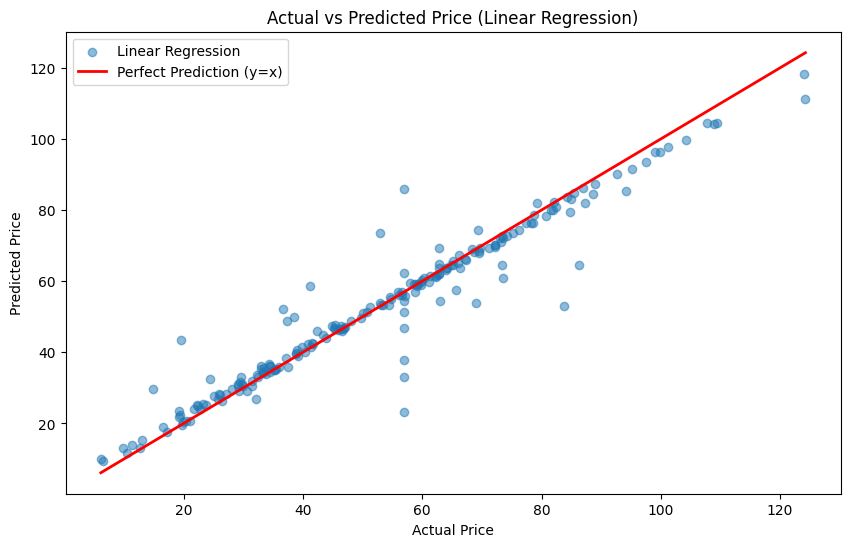

In [14]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_pred: {len(y_pred)}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction (y=x)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Linear Regression)')
plt.legend()
plt.show()

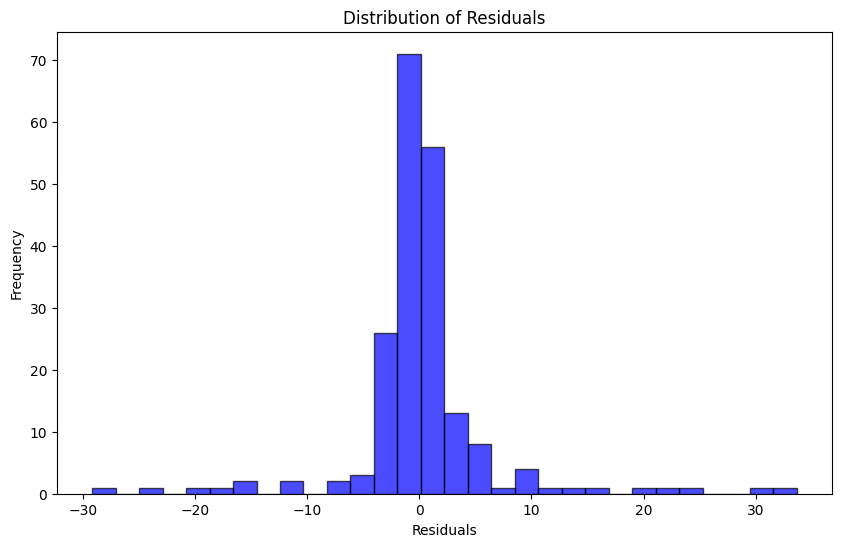

In [15]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

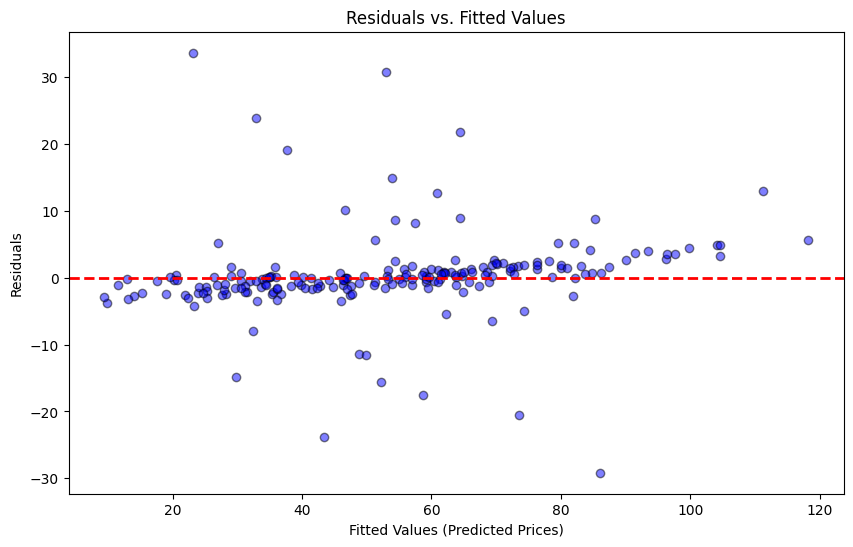

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values (Predicted Prices)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

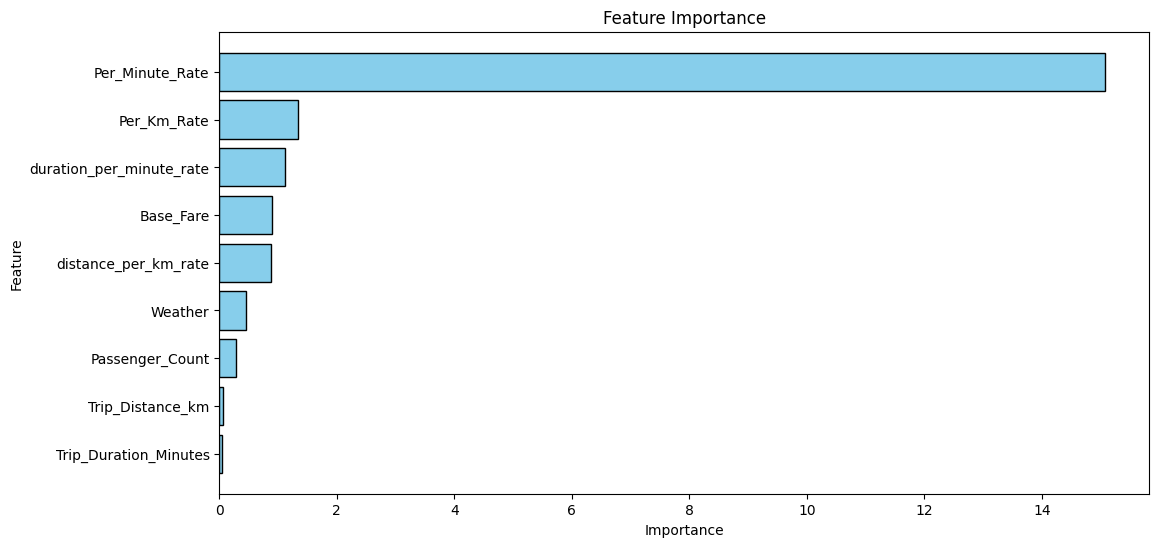

In [17]:
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()